In [1]:
import math
import statistics
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from scipy import stats as st

In [2]:
trainset=pd.read_csv('Electric_Vehicle_Population_Data.csv')

In [3]:
trainset.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1C4JJXP66P,Kitsap,Poulsbo,WA,98370.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,23.0,258127145,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
1,1G1FX6S08K,Snohomish,Lake Stevens,WA,98258.0,2019,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,44.0,4735426,POINT (-122.06402 48.01497),PUGET SOUND ENERGY INC,5.306105e+10
2,WBY1Z2C58F,King,Seattle,WA,98116.0,2015,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81.0,0.0,34.0,272697666,POINT (-122.41067 47.57894),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJ3E1EBXK,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,37.0,477309682,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1V24F,Yakima,Selah,WA,98942.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,0.0,15.0,258112970,POINT (-120.53145 46.65405),PACIFICORP,5.307700e+10


In [4]:
trainset.tail()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
223990,7SAYGDEE4R,Pierce,Puyallup,WA,98374.0,2024,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,2.0,264662359,POINT (-122.27575 47.13959),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
223991,WBY8P2C00M,Snohomish,Lake Stevens,WA,98258.0,2021,BMW,I3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,44.0,157728168,POINT (-122.06402 48.01497),PUGET SOUND ENERGY INC,5.306105e+10
223992,JN1AZ0CP3B,Pierce,University Place,WA,98466.0,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73.0,0.0,28.0,261733433,POINT (-122.53756 47.23165),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
223993,5YJ3E1EA2R,Pierce,Puyallup,WA,98374.0,2024,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,25.0,275283487,POINT (-122.27575 47.13959),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
223994,WBY8P8C57K,King,Woodinville,WA,98072.0,2019,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,126.0,0.0,45.0,267288801,POINT (-122.15545 47.75448),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [5]:
trainset.shape

(223995, 17)

In [6]:
trainset.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,223992.000000,223995.000000,223977.000000,223977.000000,223521.000000,2.239950e+05,2.239920e+05
mean,98176.491165,2021.264408,47.736187,829.894386,28.876361,2.329328e+08,5.297997e+10
std,2544.240509,2.989676,84.987140,7372.509049,14.911023,6.884329e+07,1.531491e+09
min,1731.000000,1999.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2020.000000,0.000000,0.000000,17.000000,2.008002e+08,5.303301e+10
50%,98126.000000,2022.000000,0.000000,0.000000,32.000000,2.482992e+08,5.303303e+10
75%,98374.000000,2023.000000,39.000000,0.000000,42.000000,2.673973e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


In [7]:
trainset.isnull().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        18
Base MSRP                                             18
Legislative District                                 474
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

In [8]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223995 entries, 0 to 223994
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         223995 non-null  object 
 1   County                                             223992 non-null  object 
 2   City                                               223992 non-null  object 
 3   State                                              223995 non-null  object 
 4   Postal Code                                        223992 non-null  float64
 5   Model Year                                         223995 non-null  int64  
 6   Make                                               223995 non-null  object 
 7   Model                                              223995 non-null  object 
 8   Electric Vehicle Type                              223995 non-null  object

## Univariate analysis

Text(0.5, 1.0, 'Number of electric vehicles of each type')

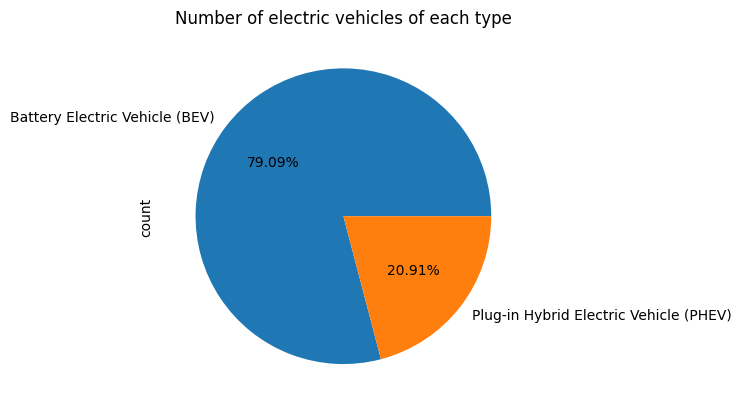

In [12]:
trainset['Electric Vehicle Type'].value_counts().plot(kind="pie",autopct="%1.2f%%")
plt.title('Number of electric vehicles of each type')

Most of the Vehicles are Battery Electric Vehicles

Text(0.5, 1.0, 'Clean Alternative Fuel Vehicle (CAFV) Eligibility')

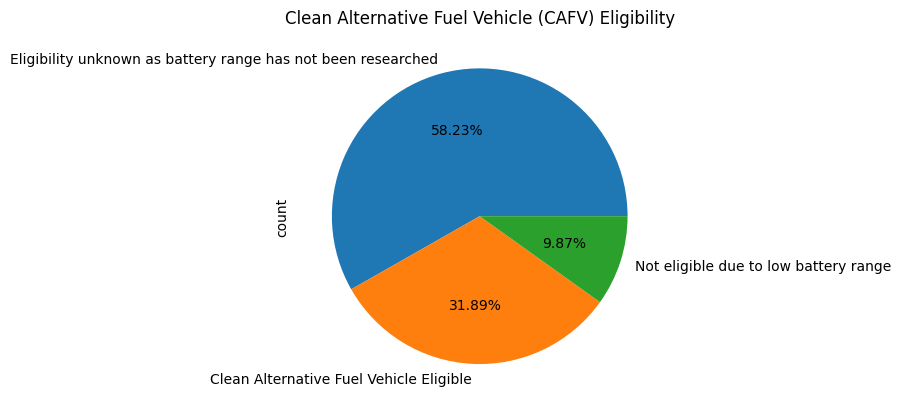

In [13]:
trainset['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts().plot(kind="pie",autopct="%1.2f%%")
plt.title('Clean Alternative Fuel Vehicle (CAFV) Eligibility')

Eligibilty of large number of vehicle is unknown. Hence, research is needed in this area.<br>
For vehicles with known ranges most of them have Clean alternatives.

Text(0.5, 1.0, 'Number of vehicles in each country')

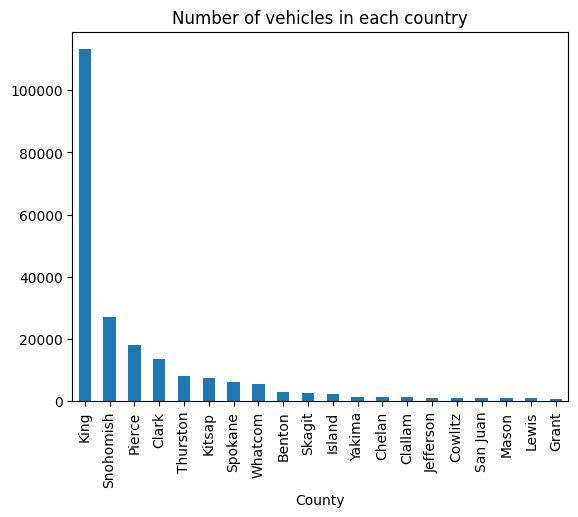

In [14]:
trainset['County'].value_counts().head(20).plot(kind='bar')
plt.title('Number of vehicles in each country')

King country has maximum number of vehicles followed by Snohomish and Pierce

Text(0.5, 1.0, 'Model year')

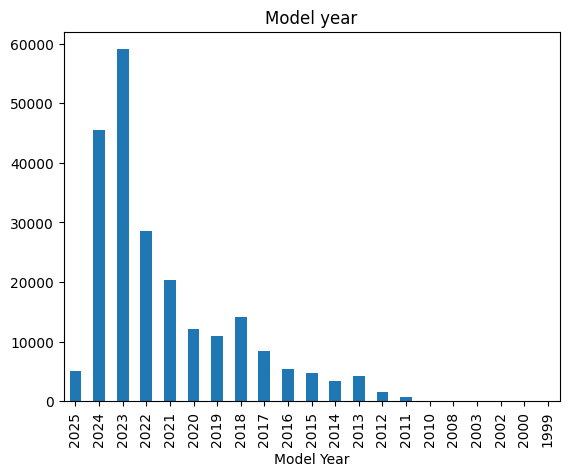

In [15]:
year=trainset['Model Year']
year.value_counts().sort_index(ascending=False).plot(kind='bar')
plt.title('Model year')

Car Models made in 2023 are most famous and widely used.<br>
A large number of people discarded the use of old cars or cars became famous only after 2017.(no stable model before that)

Text(0.5, 1.0, 'Makers of the cars')

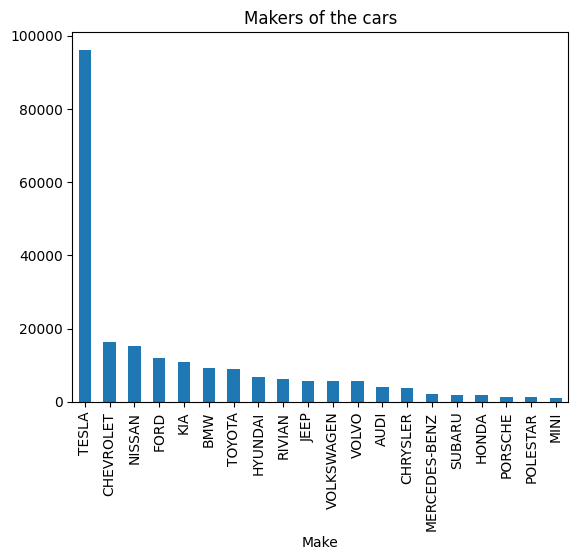

In [16]:
trainset['Make'].value_counts().head(20).plot(kind='bar')
plt.title("Makers of the cars")

Tesla and Chevrolet are the leading brands in the dataset.<br>
Other popular brands include Nissan, BMW, and Ford.

<Axes: ylabel='Electric Utility'>

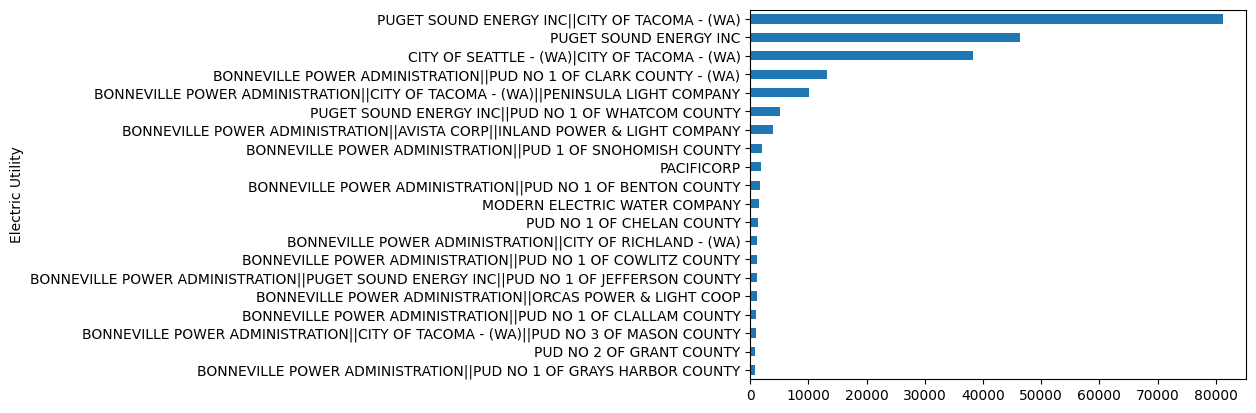

In [17]:
trainset['Electric Utility'].value_counts().head(20).sort_values().plot(kind='barh')

Electric utility of "PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)" is highest

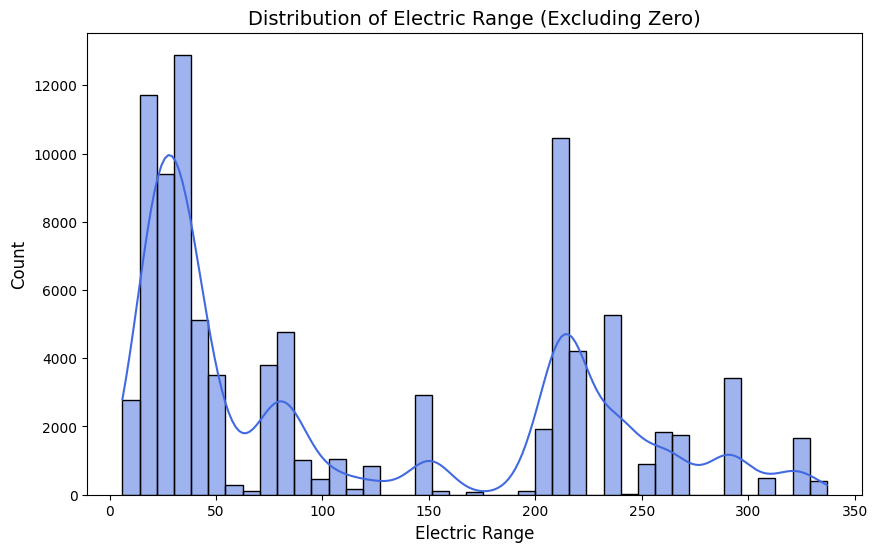

In [18]:
plt.figure(figsize=(10, 6))  # Set figure size
sns.histplot(trainset[trainset['Electric Range'] > 0]['Electric Range'], kde=True, color="royalblue")
plt.title('Distribution of Electric Range (Excluding Zero)', fontsize=14)
plt.xlabel('Electric Range', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


The distribution of Electric Range is multimodal, indicating distinct EV categories.<br>Peaks around 20-50 miles suggest plug-in hybrid vehicles (PHEVs), while 200+ miles likely represent fully electric vehicles (BEVs).<br>Gaps between peaks imply that EVs are produced with standard battery sizes rather than a continuous range.<br>The dominance of short-range EVs suggests urban use, while long-range EVs cater to longer trips.

In [19]:
trainset['Electric Range'].skew()

np.float64(1.7949860495728807)

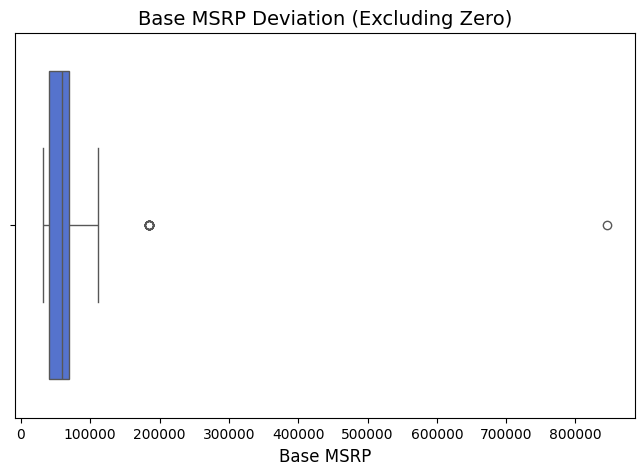

In [20]:
plt.figure(figsize=(8, 5)) 
sns.boxplot(x=trainset[trainset['Base MSRP'] > 0]['Base MSRP'], color="royalblue")
plt.title('Base MSRP Deviation (Excluding Zero)', fontsize=14)
plt.xlabel('Base MSRP', fontsize=12)
plt.show()

Above is the box plt of Base MSRP Deviation which shows some outliers in the data and also other statistical data

In [21]:
trainset[trainset['Base MSRP']>0].describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,3259.000000,3260.000000,3260.000000,3260.000000,3248.000000,3.260000e+03,3.259000e+03
mean,98144.875422,2015.640798,120.418405,57017.562883,30.148707,2.103900e+08,5.297511e+10
std,2814.983287,2.504637,90.090060,23039.629998,14.536459,9.717805e+07,1.477487e+09
min,20152.000000,2008.000000,12.000000,31950.000000,1.000000,8.981300e+04,6.041124e+09
25%,98052.000000,2013.000000,17.000000,39995.000000,20.000000,1.452404e+08,5.303301e+10
50%,98125.000000,2016.000000,93.000000,59900.000000,34.000000,1.982241e+08,5.303303e+10
75%,98374.000000,2018.000000,208.000000,69900.000000,43.000000,2.584770e+08,5.305307e+10
max,99403.000000,2020.000000,265.000000,845000.000000,49.000000,4.787588e+08,5.307700e+10


## Multivariate analysis

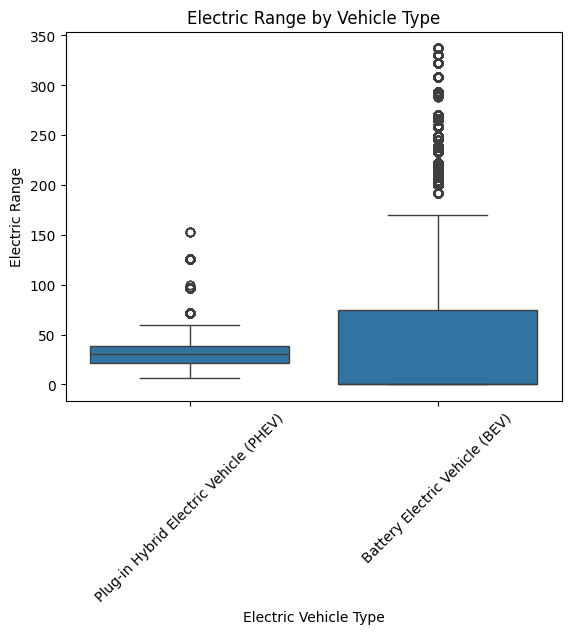

In [22]:
# Boxplot: Electric Range by Electric Vehicle Type
sns.boxplot(x="Electric Vehicle Type", y="Electric Range", data=trainset)
plt.xticks(rotation=45)
plt.title("Electric Range by Vehicle Type")
plt.show()

Electric Range by Vehicle Type:<br>
BEVs(Battery Electric Vehicles) have a higher median range than PHEVs (Plug-in Hybrid Electric Vehicles).<br>
PHEVs show lower range values, likely due to their reliance on both electric and fuel power.

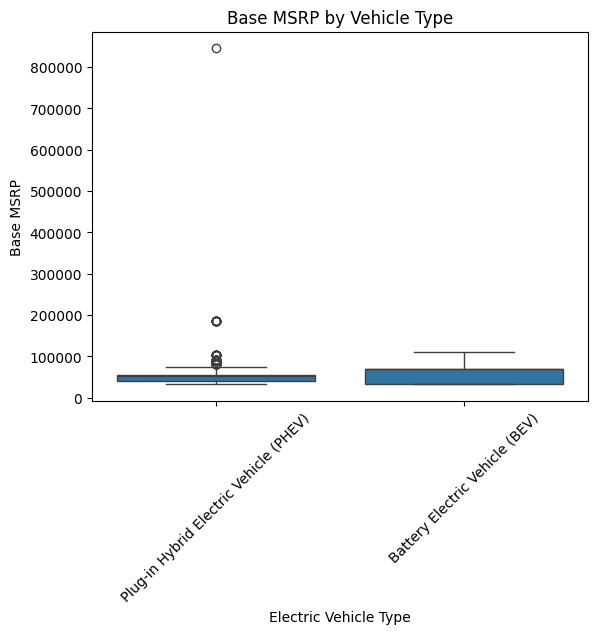

In [23]:
# Boxplot: Base MSRP by Electric Vehicle Type
data1=trainset[trainset['Base MSRP']>0]
sns.boxplot(x="Electric Vehicle Type", y="Base MSRP", data=data1)
plt.xticks(rotation=45)
plt.title("Base MSRP by Vehicle Type")
plt.show()

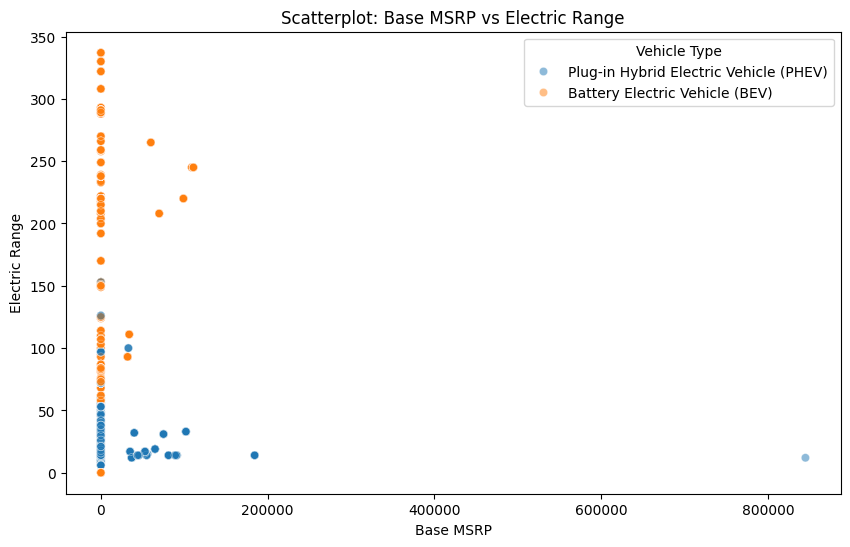

In [24]:
trainset_clean = trainset.dropna(subset=["Electric Range", "Base MSRP", "Model Year"])
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Base MSRP", y="Electric Range", hue="Electric Vehicle Type", data=trainset_clean, alpha=0.5)
plt.title("Scatterplot: Base MSRP vs Electric Range")
plt.xlabel("Base MSRP")
plt.ylabel("Electric Range")
plt.legend(title="Vehicle Type")
plt.show()

No strong trend between Base MSRP and Electric Range.<br>
BEVs cluster at higher ranges, while PHEVs mostly stay below ~50 miles.

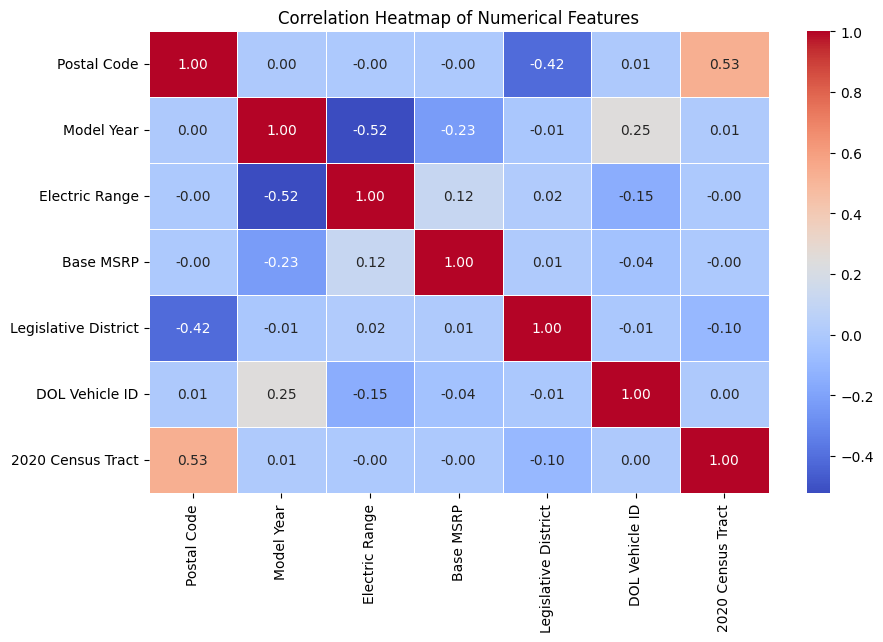

In [25]:
plt.figure(figsize=(10, 6))
sns.heatmap(trainset_clean.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

Model Year and Electric Range show weak correlation.<br>
Base MSRP has little impact on Electric Range.<br>
No strong linear relationships exist between numerical variables.